In [1]:
# Importing basic packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import os



In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
#import the datatset 

mydata = pd.read_excel('Win_Prediction_Data.xlsx')
mydata.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [4]:
new_data = mydata.copy()


In [5]:
new_data.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [6]:
#finding missing data

new_data.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [7]:
(new_data.isnull().sum() / len(new_data))*100

Client Category     0.78521
Solution Type       0.00000
Deal Date           0.00000
Sector              0.00000
Location            0.00000
VP Name             0.00000
Manager Name        0.00000
Deal Cost           0.00000
Deal Status Code    0.00000
dtype: float64

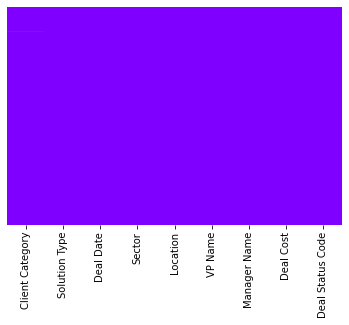

In [8]:
sns.heatmap(new_data.isnull() , yticklabels = False,cbar=False , cmap = 'rainbow')
plt.show()

In [9]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [10]:
# Handling missing value

new_data['Client Category'].value_counts()


Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [11]:
new_data['Client Category'] = new_data['Client Category'].fillna('Others')

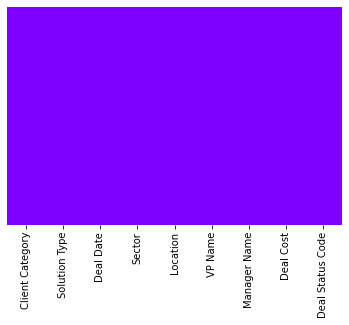

In [12]:
sns.heatmap(new_data.isnull() , yticklabels = False,cbar=False , cmap = 'rainbow')
plt.show()

#no missing data now

In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [14]:
# Describing the object data type

sumcat = new_data.describe(include='O')
sumcat

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,10061,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1842,1439,2693,3360,1166,323,6306


In [15]:
new_data['Deal Status Code'].value_counts()

#Minority * 2 > Majority then balanced

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

In [16]:
Client_Category_index = new_data['Client Category'].value_counts().index

In [17]:
Client_Category_index

Index(['Others', 'Internal', 'Services_based', 'Tech', 'Domestic Public Bank',
       'International Bank', 'Consulting', 'Finance', 'Telecom', 'Power ind',
       'Domestic Private Bank', 'Insurance', 'Consumer Good', 'Automobiles',
       'Infrastructure', 'Domestic Bank', 'Retail_market', 'Govt',
       'Hospitality', 'Manufacturing', 'Pharma', 'Healthcare', 'Electronics',
       'Media_Journal', 'Industries', 'Research Development', 'Energy',
       'Knowledge', 'Management', 'Govt Bank Special', 'Payment', 'Energy ',
       'e-commerce', 'Airpline', 'Holding', 'International Org', 'Logistics',
       'Real Estate', 'Share_market', 'Tax_audit', 'Medical '],
      dtype='object')

In [18]:
Client_category = new_data['Client Category'].value_counts()

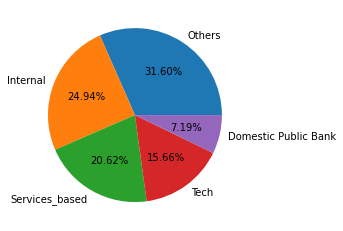

In [19]:
plt.pie(Client_category[:5],labels = Client_Category_index[:5],autopct ='%1.2f%%')
plt.show()

<AxesSubplot:>

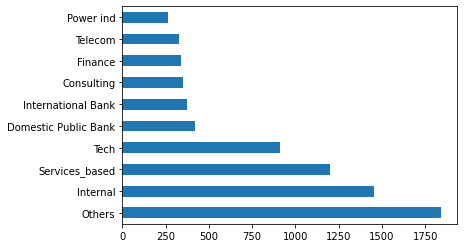

In [20]:
Client_category[:10].plot(kind='barh')

In [21]:
new_data.head(5)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [22]:
VP_Name = new_data['VP Name'].value_counts()
VP_Name

Mervin Harwood         1166
Ankita Aggarwal        1143
Sargar Deep Rao         956
Long Bergstrom          921
Mangesh K. Singh        812
Rosanna Maynez          662
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          208
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Molly Eakes             126
Alam Syed               126
Gaurav Sameria          114
Varsha Arora            104
Gayle Molter            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Marcella Mo              32
Rahul Kocher             32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

In [23]:
VP_Name_index = new_data['VP Name'].value_counts().index

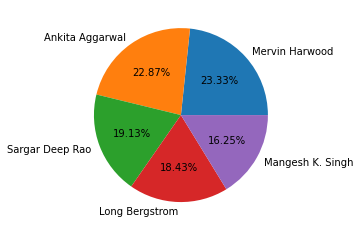

In [24]:
plt.pie(VP_Name[:5],labels = VP_Name_index[:5],autopct ='%1.2f%%')
plt.show()

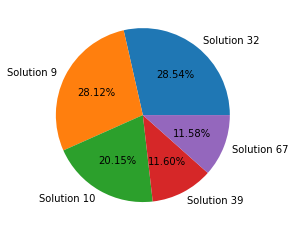

In [25]:
Solution_Type = new_data['Solution Type'].value_counts()
Solution_Type_index = new_data['Solution Type'].value_counts().index

plt.pie(Solution_Type[:5],labels = Solution_Type_index[:5],autopct ='%1.2f%%')
plt.show()

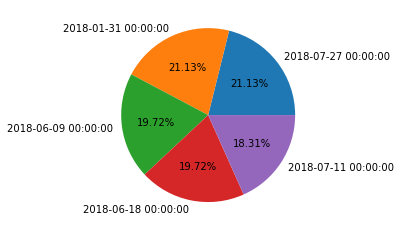

In [26]:
Deal_Date = new_data['Deal Date'].value_counts()
Deal_Date_index = new_data['Deal Date'].value_counts().index

plt.pie(Deal_Date[:5],labels = Deal_Date_index[:5],autopct ='%1.2f%%')
plt.show()

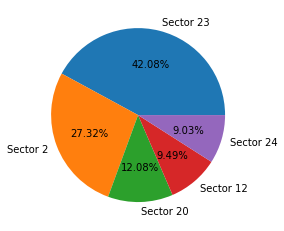

In [27]:
Sector = new_data['Sector'].value_counts()
Sector_index = new_data['Sector'].value_counts().index

plt.pie(Sector[:5],labels = Sector_index[:5],autopct ='%1.2f%%')
plt.show()

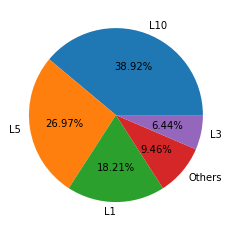

In [28]:
Location = new_data['Location'].value_counts()
Location_index = new_data['Location'].value_counts().index

plt.pie(Location[:5],labels = Location_index[:5],autopct ='%1.2f%%')
plt.show()

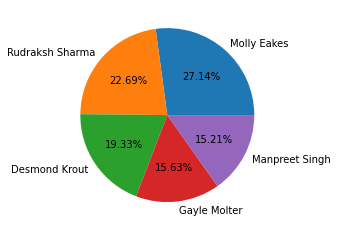

In [29]:
Manager_Name = new_data['Manager Name'].value_counts()
Manager_Name_index = new_data['Manager Name'].value_counts().index

plt.pie(Manager_Name[:5],labels = Manager_Name_index[:5],autopct ='%1.2f%%')
plt.show()

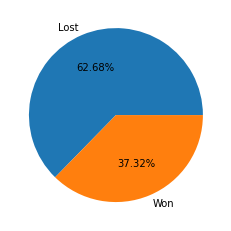

In [31]:

Deal_Status_Code = new_data['Deal Status Code'].value_counts()
Deal_Status_Code_index = new_data['Deal Status Code'].value_counts().index

plt.pie(Deal_Status_Code,labels = Deal_Status_Code_index,autopct ='%1.2f%%')
plt.show()

In [32]:
# Checking relationship between independent variable vs dependent variable

new_data.head(2)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won


In [33]:
new_data.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')

In [34]:
rel_client_cat = new_data[['Client Category',
                           'Deal Status Code']].groupby(['Client Category',
                                                         'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Code'})

In [35]:
rel_client_cat

,Client Category,Deal Status Code,Deal Status Code
0,Airpline,Lost,22
1,Airpline,Won,5
2,Automobiles,Lost,112
3,Automobiles,Won,66
4,Consulting,Lost,182
...,...,...,...
77,Tech,Won,313
78,Telecom,Lost,192
79,Telecom,Won,135
80,e-commerce,Lost,20


In [36]:
Solution_Type_cat = new_data[['Solution Type',
                           'Deal Status Code']].groupby(['Solution Type',
                                                         'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Code'})

In [37]:
Solution_Type_cat

,Solution Type,Deal Status Code,Deal Status Code
0,Solution 1,Lost,2
1,Solution 1,Won,3
2,Solution 10,Lost,690
3,Solution 10,Won,326
4,Solution 11,Lost,88
...,...,...,...
111,Solution 7,Won,62
112,Solution 8,Lost,190
113,Solution 8,Won,184
114,Solution 9,Lost,1018


In [38]:
VP_Name_cat = new_data[['VP Name',
                           'Deal Status Code']].groupby(['VP Name',
                                                         'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Code'})
VP_Name_cat

,VP Name,Deal Status Code,Deal Status Code
0,Alam Syed,Lost,62
1,Alam Syed,Won,64
2,Ankita Aggarwal,Lost,866
3,Ankita Aggarwal,Won,277
4,Brendon Wycoff,Lost,132
...,...,...,...
77,md. afsar,Lost,2
78,neeraj kumar,Lost,254
79,neeraj kumar,Won,217
80,som dutt,Lost,138


In [39]:

Manager_Name_cat = new_data[['Manager Name',
                           'Deal Status Code']].groupby(['Manager Name',
                                                         'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Code'})
Manager_Name_cat

,Manager Name,Deal Status Code,Deal Status Code
0,Aastha Gandhi,Won,1
1,Abhinav Warrier,Lost,80
2,Abhinav Warrier,Won,15
3,Abhishek Singhal,Lost,44
4,Abhishek Singhal,Won,23
...,...,...,...
470,sunder paal,Won,6
471,vansu dev,Lost,78
472,vansu dev,Won,54
473,vinit katariya,Lost,14


In [40]:
managers = pd.pivot_table(new_data,index = 'Deal Status Code',columns = 'Manager Name',values= 'Deal Cost')

In [41]:
managers

Manager Name,Aastha Gandhi,Abhinav Warrier,Abhishek Singhal,Abhiskek Kumar,Abhiskhek D,Abram Fines,Aditya Kumar,Aditya Tondon,Ahdarsha Jha,Ahswini Saini,...,shafibul,sharat chandran,sheak shakir,shiv kumar,shiv shakti singh,shyam kumar,som dutt,sunder paal,vansu dev,vinit katariya
Deal Status Code,,,,,,,,,,,,,,,,,,,,,
Lost,NaN,588808.824000,772860.963182,949894.957857,440767.973889,501764.706000,792647.06,1058823.53,924866.311818,1029411.77,...,2.867647e+06,441176.470,882352.940000,219019.61,1470588.24,715250.000000,NaN,882352.940,9.687406e+05,1.098739e+06
Won,242647.06,302235.296667,476956.522609,587507.740789,375658.823600,714127.789655,250367.65,NaN,351102.940000,601470.59,...,NaN,989411.765,461127.451667,NaN,NaN,307769.608333,198627.45,371960.785,1.253295e+06,3.917206e+06


In [42]:
Sub = pd.pivot_table(new_data,index = 'Deal Status Code',columns = 'VP Name',values= 'Deal Cost')

In [43]:
Sub

VP Name,Alam Syed,Ankita Aggarwal,Brendon Wycoff,Clinton Mani,Dennis Faux,Earline Langton,Ekta Zutshi,Gaurav Sameria,Gayle Molter,Gopa Trilochana,...,Saurabh Singh,Son Mcconnaughy,Varsha Arora,Vidur Hukle,Vikram Rawat,Visvajeet Das,Waylon Mulder,md. afsar,neeraj kumar,som dutt
Deal Status Code,,,,,,,,,,,,,,,,,,,,,
Lost,1.087144e+06,654206.63000,1.096894e+06,776755.218548,554656.861667,1.189219e+06,7.912821e+05,554590.017879,7.291971e+05,1.464321e+06,...,761066.176429,1.517227e+06,7.272255e+05,615517.241724,1.681103e+06,1176470.59,235294.12,3235294.12,478943.956142,554650.469710
Won,1.172937e+06,503528.35065,1.909288e+06,600857.843500,315294.120000,6.034314e+05,1.021396e+06,586433.823958,1.282863e+06,8.195701e+05,...,962863.052187,5.470632e+05,3.454505e+06,540581.233095,5.161111e+05,5588235.29,88235.29,NaN,693700.190092,562977.044756


In [44]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [45]:
import datetime

In [46]:
new_data['Deal_Date_year']=new_data['Deal Date'].dt.year

In [47]:
new_data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011


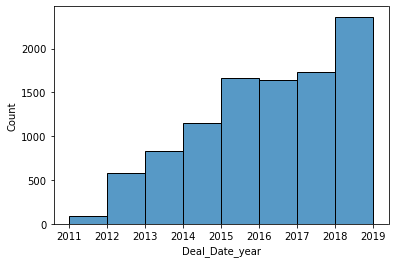

In [48]:
sns.histplot(new_data.Deal_Date_year, bins=8)
plt.show()

In [49]:
new_data['Deal_Date_month']=new_data['Deal Date'].dt.month

In [50]:
new_data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


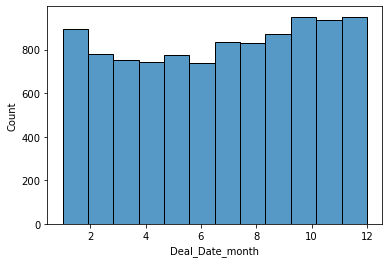

In [52]:
sns.histplot(new_data.Deal_Date_month, bins=12)
plt.show()

In [53]:
new_data['Deal_Date_quarter']=new_data['Deal Date'].dt.quarter

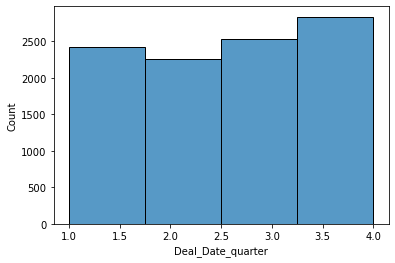

In [54]:
sns.histplot(new_data.Deal_Date_quarter, bins=4)
plt.show()

<AxesSubplot:>

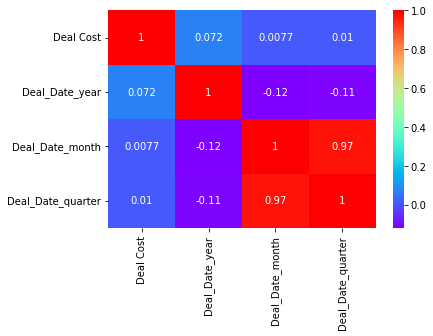

In [55]:
sns.heatmap(new_data.corr(),annot = True ,cmap='rainbow')

In [56]:
new_data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


In [57]:
new_data['Client Category'].value_counts()

Others                   1842
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [58]:
#Label Encoder is only required as dependent variables are in characters

#Label Encoder - Char to number
#One hot encoder - all number to columns in binary
#Dummy variable - To handle multicollinearty

In [59]:
new_data.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code',
       'Deal_Date_year', 'Deal_Date_month', 'Deal_Date_quarter'],
      dtype='object')

In [60]:
new_data = new_data.drop(['Deal Date'],axis =1)

In [61]:
new_data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


In [62]:
new_data['Client Category'] = new_data['Client Category'].astype('category')
new_data['Client Category'] = new_data['Client Category'].cat.codes

new_data['Solution Type'] = new_data['Solution Type'].astype('category')
new_data['Solution Type'] = new_data['Solution Type'].cat.codes

new_data['Sector'] = new_data['Sector'].astype('category')
new_data['Sector'] = new_data['Sector'].cat.codes

new_data['Location'] = new_data['Location'].astype('category')
new_data['Location'] = new_data['Location'].cat.codes

new_data['VP Name'] = new_data['VP Name'].astype('category')
new_data['VP Name'] = new_data['VP Name'].cat.codes


new_data['Manager Name'] = new_data['Manager Name'].astype('category')
new_data['Manager Name'] = new_data['Manager Name'].cat.codes


new_data['Deal Status Code'] = new_data['Deal Status Code'].astype('category')
new_data['Deal Status Code'] = new_data['Deal Status Code'].cat.codes


In [63]:
new_data = new_data.iloc[:,0:8]

In [64]:
new_data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,39,64,16,7,6,82,150000.00,1
1,39,64,16,7,6,82,744705.88,1
2,19,54,12,12,6,183,60000.00,0
3,19,54,12,12,6,183,60000.00,0
4,19,25,12,12,6,183,80882.35,0


In [65]:
#splitting data into X and Y

x = new_data.iloc[:,0:-1].values
y = new_data['Deal Status Code'].values

In [66]:
x

array([[3.90000000e+01, 6.40000000e+01, 1.60000000e+01, ...,
        6.00000000e+00, 8.20000000e+01, 1.50000000e+05],
       [3.90000000e+01, 6.40000000e+01, 1.60000000e+01, ...,
        6.00000000e+00, 8.20000000e+01, 7.44705880e+05],
       [1.90000000e+01, 5.40000000e+01, 1.20000000e+01, ...,
        6.00000000e+00, 1.83000000e+02, 6.00000000e+04],
       ...,
       [3.10000000e+01, 6.60000000e+01, 2.40000000e+01, ...,
        2.90000000e+01, 1.82000000e+02, 5.88235290e+05],
       [3.10000000e+01, 5.80000000e+01, 2.40000000e+01, ...,
        1.90000000e+01, 5.00000000e+01, 3.04205882e+06],
       [2.80000000e+01, 6.60000000e+01, 3.00000000e+00, ...,
        3.40000000e+01, 2.16000000e+02, 1.47058820e+05]])

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)

In [68]:
x1

array([[ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.38084443],
       [ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.01369972],
       [-0.33339304,  0.86106354,  0.01663725, ..., -1.11119992,
         0.60004268, -0.43640639],
       ...,
       [ 0.70843971,  1.38496843,  2.32277814, ...,  0.79154462,
         0.58701806, -0.11029764],
       [ 0.70843971,  1.0356985 ,  2.32277814, ..., -0.03573561,
        -1.13223202,  1.40458284],
       [ 0.44798152,  1.38496843, -1.71296842, ...,  1.20518474,
         1.0298552 , -0.38266018]])

In [69]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(x1,y,random_state=101,train_size = 0.70)

## Deep Neural Network


In [70]:
#Architecture - Sequential / Functional

dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.layers.Dense(units = 20,activation='relu'))
dnn.add(tf.keras.layers.Dense(units = 20,activation='relu'))
dnn.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))
dnn.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])
dnn.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
221/221 [==============================] - 6s 2ms/step - loss: 0.6717 - accuracy: 0.5988
Epoch 2/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.6184
Epoch 3/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.6177
Epoch 4/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.6194
Epoch 5/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.6220
Epoch 6/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.6271
Epoch 7/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.6297
Epoch 8/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6405 - accuracy: 0.6342
Epoch 9/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.6440
Epoch 10/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6364 - accura

In [71]:
dnn.fit(x_train,y_train,batch_size=32,epochs=25)

Epoch 1/25
221/221 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.6852
Epoch 2/25
221/221 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.6832
Epoch 3/25
221/221 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.6865
Epoch 4/25
221/221 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.6874
Epoch 5/25
221/221 [==============================] - 0s 1ms/step - loss: 0.5863 - accuracy: 0.6863
Epoch 6/25
221/221 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.6847
Epoch 7/25
221/221 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.6847
Epoch 8/25
221/221 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.6802
Epoch 9/25
221/221 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.6877
Epoch 10/25
221/221 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.6873

In [72]:
y_pred = dnn.predict(x_test)
y_pred = (y_pred>0.5)
y_pred

95/95 [==============================] - 0s 785us/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [73]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [74]:
print(confusion_matrix(y_test,y_pred))

[[1611  344]
 [ 682  382]]


In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76      1955
           1       0.53      0.36      0.43      1064

    accuracy                           0.66      3019
   macro avg       0.61      0.59      0.59      3019
weighted avg       0.64      0.66      0.64      3019



In [76]:
print(accuracy_score(y_test,y_pred))

0.6601523683338854
